#Importing the libraries





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly import tools
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn import tree
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn.compose import ColumnTransformer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score


# importing the data

In [ ]:
#we named our dataframe 'data'
data = pd.read_csv('heart.csv')



# Data exploration

In [ ]:
#quick look on datafram to understand it
data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:

EDA = data.copy()
EDA.shape


(918, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

we can see the number of unique values for each column

**Numerical features**

Because there are so many distinct values, I had to examine using the describ function.

In [ ]:
data[data['HeartDisease']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Age,410.000000,50.551220,9.444915,28.000000,43.000000,51.000000,57.000000,76.000000
RestingBP,410.000000,130.180488,16.499585,80.000000,120.000000,130.000000,140.000000,190.000000
Cholesterol,410.000000,227.121951,74.634659,0.000000,197.250000,227.000000,266.750000,564.000000
FastingBS,410.000000,0.107317,0.309894,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,410.000000,148.151220,23.288067,69.000000,134.000000,150.000000,165.000000,202.000000
Oldpeak,410.000000,0.408049,0.699709,-1.100000,0.000000,0.000000,0.600000,4.200000
HeartDisease,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
data[data['HeartDisease']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='YlGn')

,count,mean,std,min,25%,50%,75%,max
Age,508.000000,55.899606,8.727056,31.000000,51.000000,57.000000,62.000000,77.000000
RestingBP,508.000000,134.185039,19.828685,0.000000,120.000000,132.000000,145.000000,200.000000
Cholesterol,508.000000,175.940945,126.391398,0.000000,0.000000,217.000000,267.000000,603.000000
FastingBS,508.000000,0.334646,0.472332,0.000000,0.000000,0.000000,1.000000,1.000000
MaxHR,508.000000,127.655512,23.386923,60.000000,112.000000,126.000000,144.250000,195.000000
Oldpeak,508.000000,1.274213,1.151872,-2.600000,0.000000,1.200000,2.000000,6.200000
HeartDisease,508.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Visualize the data**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



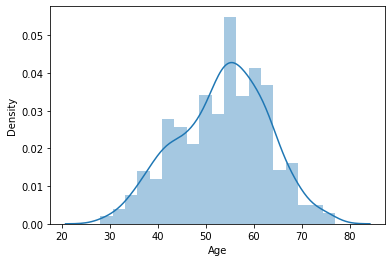

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



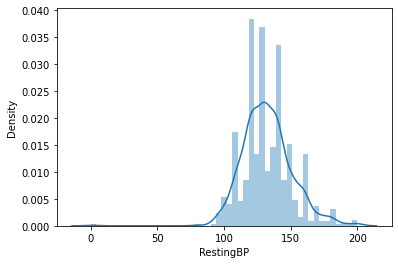

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



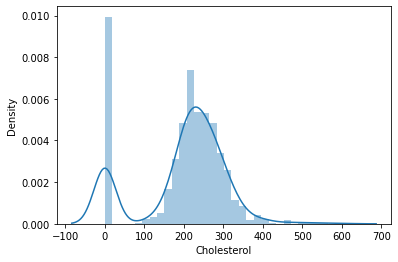

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



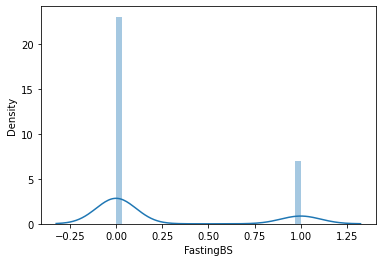

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



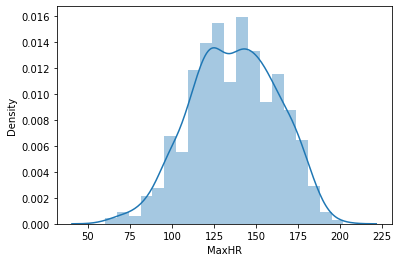

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



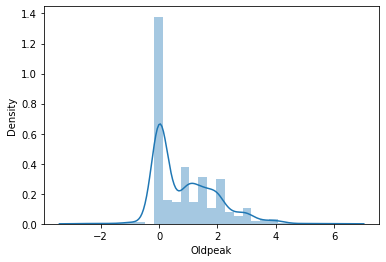

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



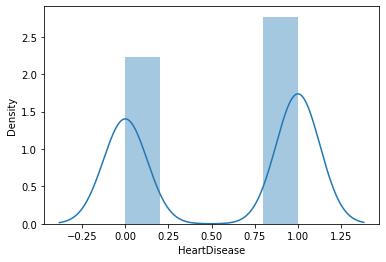

In [ ]:
num_feat = ["Age",
           "RestingBP",
           "Cholesterol",
           "FastingBS",
           "MaxHR",
           "Oldpeak",
           "HeartDisease"
           ]


for col in EDA[num_feat]:
    plt.figure()
    sns.distplot(EDA[col])
    plt.show()

In [ ]:


fig = go.Figure(data=[go.Pie(labels=data['HeartDisease'].value_counts().index,
                             values=data['HeartDisease'].value_counts().values)])

fig.update_layout(
title_text="Heart disease ")
fig.show()

Based on this, the data is balanced.

**Categorical features**

In [ ]:
fig = go.Figure(data=[go.Pie(labels=data['Sex'].value_counts().index,
                             values=data['Sex'].value_counts().values)])

fig.update_layout(
    title_text="Sex ")
fig.show()

In [ ]:
fig = go.Figure(data=[go.Pie(labels=data['ChestPainType'].value_counts().index,
                             values=data['ChestPainType'].value_counts().values)])

fig.update_layout(
    title_text="Chest pain type ")
fig.show()

In [ ]:
fig = go.Figure(data=[go.Pie(labels=data['RestingECG'].value_counts().index,
                             values=data['RestingECG'].value_counts().values)])

fig.update_layout(
    title_text="RestingECG ")
fig.show()

In [ ]:
fig = go.Figure(data=[go.Pie(labels=data['ExerciseAngina'].value_counts().index,
                             values=data['ExerciseAngina'].value_counts().values)])

fig.update_layout(
    title_text="ExerciseAngina")
fig.show()

In [ ]:
fig = go.Figure(data=[go.Pie(labels=data['ST_Slope'].value_counts().index,
                             values=data['ST_Slope'].value_counts().values)])

fig.update_layout(
    title_text="ST_Slop")
fig.show()

# Cleaning the data

**View missing data**

In [ ]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There's no missing data.

**Checking for duplicated rows**

In [ ]:
data.duplicated().sum()

0

There's no duplicated rows in our dataset.

# Relationship analysis

**Data correlation**

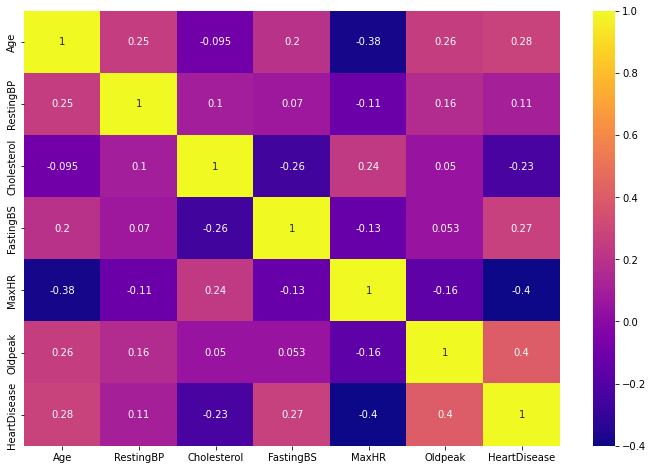

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),cmap='plasma',annot=True)

As we notice from the heatmap, all features have a correlation to heart diseases. So all the attributes will impact the prediction.

In [ ]:

data_forplot = data.loc[:,['RestingBP', 'Cholesterol', 'MaxHR']]
data_forplot["index"] = np.arange(1,len(data_forplot)+1)
fig = ff.create_scatterplotmatrix(data_forplot, diag='box', index='index',colormap='Bluered',
                                  height=800, width=800)
iplot(fig)

# Data preprocessing

**Splitting the target and the features**

In [ ]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [ ]:
x.shape



(918, 11)

In [ ]:
y.shape

(918,)

In [ ]:

#Label Encoding the object dtypes.
le = LabelEncoder()
x[:,1] = le.fit_transform(x[:,1])
x[:,6] = le.fit_transform(x[:,6])
x[:,8] = le.fit_transform(x[:,8])


In [ ]:
x

In [ ]:
enc = OneHotEncoder()
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2 ,10])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
x

**Splitting the data into training & test data**

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2 , stratify=y, random_state=1)

In [ ]:
S = MinMaxScaler()
x_train = S.fit_transform(x_train)
x_test = S.fit_transform(x_test)


In [ ]:
x_train

# 1- Logistic regression

In [ ]:
#Load Logistic regression model to the 'LR' variable
LR = LogisticRegression()

In [ ]:
#training the model using train data
LR.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred_LR = LR.predict(x_test)
cm = confusion_matrix(y_test, y_pred_LR)
LR_report = classification_report(y_test, y_pred_LR)
f1_score(y_test ,y_pred_LR)
accuracy_score(y_test ,y_pred_LR)

0.8369565217391305

In [ ]:
print(LR_report)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        82
           1       0.83      0.88      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



**Cross-validation**

In [ ]:
scores_LR = cross_val_score(LR, x, y, cv=5)
scores_LR

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_LR.mean(), scores_LR.std()))

0.84 accuracy with a standard deviation of 0.04


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



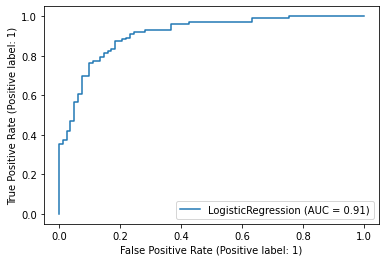

In [ ]:
plot_roc_curve(LR, x_test, y_test)

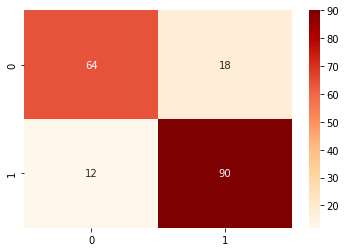

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_LR), annot=True, cmap='OrRd', fmt='g')


# 2- Decision trees

In [ ]:
#Load Decision tree model to the 'DT' variable
DT = tree.DecisionTreeClassifier()

In [ ]:
#training the model using train data
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_DT = DT.predict(x_test)
cm = confusion_matrix(y_test, y_pred_DT)
DT_report = classification_report(y_test, y_pred_DT)
f1_score(y_test ,y_pred_DT)
accuracy_score(y_test ,y_pred_DT)

0.6684782608695652

In [ ]:
print(DT_report)

              precision    recall  f1-score   support

           0       0.62      0.66      0.64        82
           1       0.71      0.68      0.69       102

    accuracy                           0.67       184
   macro avg       0.67      0.67      0.67       184
weighted avg       0.67      0.67      0.67       184



**Cross-validation**

In [ ]:
scores_DT = cross_val_score(DT, x, y, cv=5)
scores_DT

array([0.75543478, 0.76630435, 0.79347826, 0.75956284, 0.63387978])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_DT.mean(), scores_DT.std()))

0.74 accuracy with a standard deviation of 0.06


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



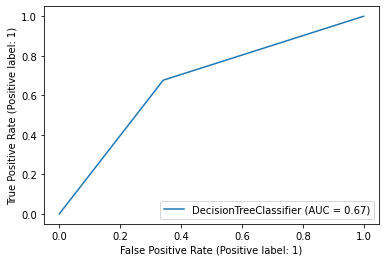

In [ ]:
plot_roc_curve(DT, x_test, y_test)

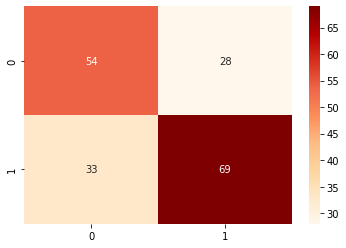

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_DT), annot=True, cmap='OrRd', fmt='g')

# 3- Support Vector machine

In [ ]:
#Load SVM tree model to the 'clf' variable
clf = svm.SVC(kernel='linear', C=1, random_state=42)



In [ ]:
#training the model using train data
clf.fit(x_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [ ]:
y_pred_clf = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred_clf)
clf_report = classification_report(y_test, y_pred_clf)
f1_score(y_test ,y_pred_clf)
accuracy_score(y_test ,y_pred_clf)

0.8369565217391305

In [ ]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        82
           1       0.82      0.90      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



**Cross-validation**

In [ ]:
scores_clf = cross_val_score(clf, x, y, cv=5)
scores_clf

array([0.85869565, 0.8423913 , 0.85869565, 0.85245902, 0.7431694 ])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_clf.mean(), scores_clf.std()))

0.83 accuracy with a standard deviation of 0.04


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



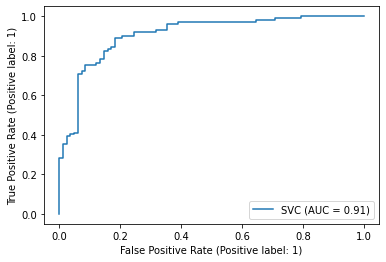

In [ ]:
plot_roc_curve(clf, x_test, y_test)

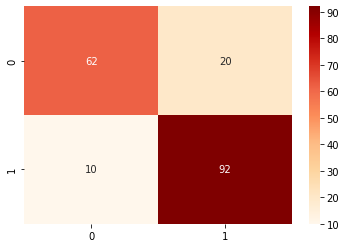

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_clf), annot=True, cmap='OrRd', fmt='g')

# 4- Random Forest

In [ ]:
#Load Random forest tree model to the 'RF' variable
RF = RandomForestClassifier()



In [ ]:
#training the model using train data
RF.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_RF = RF.predict(x_test)
cm = confusion_matrix(y_test, y_pred_RF)
RF_report = classification_report(y_test, y_pred_RF)
f1_score(y_test ,y_pred_RF)
accuracy_score(y_test ,y_pred_RF)

0.8097826086956522

In [ ]:
print(RF_report)

              precision    recall  f1-score   support

           0       0.87      0.67      0.76        82
           1       0.78      0.92      0.84       102

    accuracy                           0.81       184
   macro avg       0.82      0.80      0.80       184
weighted avg       0.82      0.81      0.81       184



**Cross-validation**

In [ ]:
scores_RF = cross_val_score(RF, x, y, cv=5)
scores_RF

array([0.89673913, 0.83152174, 0.83152174, 0.84699454, 0.7704918 ])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_RF.mean(), scores_RF.std()))

0.84 accuracy with a standard deviation of 0.04


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



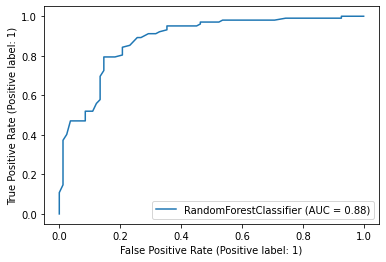

In [ ]:
plot_roc_curve(RF, x_test, y_test)

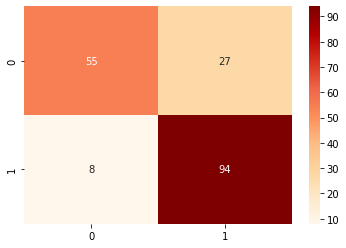

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True, cmap='OrRd', fmt='g')

# 5- K-Nearest Neighbors

In [ ]:
#Load K-Nearest Neighbours model to the 'nbrs' variable
nbrs = KNeighborsClassifier()



In [ ]:
#training the model using train data
nbrs.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_nbrs = nbrs.predict(x_test)
cm = confusion_matrix(y_test, y_pred_nbrs)
nbrs_report = classification_report(y_test, y_pred_nbrs)
f1_score(y_test ,y_pred_nbrs)
accuracy_score(y_test ,y_pred_nbrs)

0.8586956521739131

In [ ]:
print(nbrs_report)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        82
           1       0.85      0.91      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184



**Cross-validation**

In [ ]:
scores_nbrs = cross_val_score(nbrs, x, y, cv=5)
scores_nbrs

array([0.63586957, 0.76630435, 0.6576087 , 0.63387978, 0.62295082])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_nbrs.mean(), scores_nbrs.std()))

0.66 accuracy with a standard deviation of 0.05


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



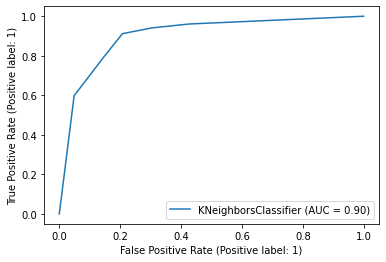

In [ ]:
plot_roc_curve(nbrs, x_test, y_test)

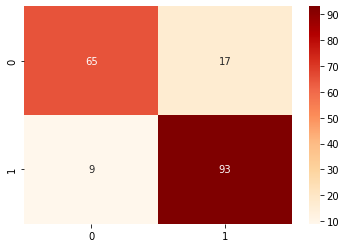

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_nbrs), annot=True, cmap='OrRd', fmt='g')

# 6- Gaussian Naive Bayes

In [ ]:
#Load Gaussian Naive Bayes model to the 'gnb' variable
gnb = GaussianNB()



In [ ]:
#training the model using train data
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred_gnb = gnb.predict(x_test)
cm = confusion_matrix(y_test, y_pred_gnb)
gnb_report = classification_report(y_test, y_pred_gnb)
f1_score(y_test ,y_pred_gnb)
accuracy_score(y_test ,y_pred_gnb)

0.8206521739130435

In [ ]:
print(gnb_report)

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        82
           1       0.79      0.92      0.85       102

    accuracy                           0.82       184
   macro avg       0.83      0.81      0.81       184
weighted avg       0.83      0.82      0.82       184



**Cross-validation**

In [ ]:
scores_gnb = cross_val_score(gnb, x, y, cv=5)
scores_gnb

array([0.86413043, 0.88586957, 0.8423913 , 0.81967213, 0.75956284])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_gnb.mean(), scores_gnb.std()))

0.83 accuracy with a standard deviation of 0.04


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



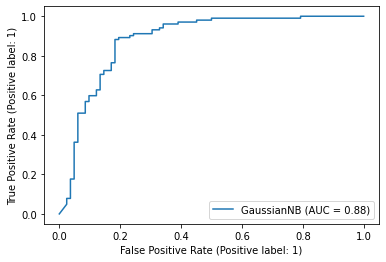

In [ ]:
plot_roc_curve(gnb, x_test, y_test)

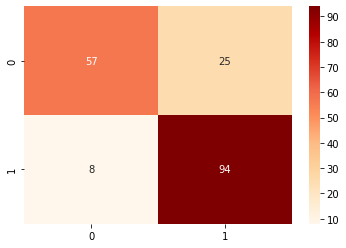

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, cmap='OrRd', fmt='g')

# Grouping the ROC curves

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function 

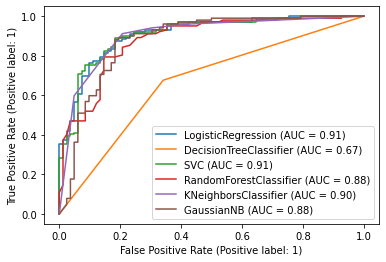

In [ ]:
disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(DT, x_test, y_test, ax=disp.ax_)
plot_roc_curve(clf, x_test, y_test, ax=disp.ax_)
plot_roc_curve(RF, x_test, y_test, ax=disp.ax_)
plot_roc_curve(nbrs, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gnb, x_test, y_test, ax=disp.ax_)